In [22]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import requests

from os import listdir
import unicodedata

from paths import *
from scripts.manipulation import remove_acentos
from scripts.manipulation import normalize_cols
from scripts import scrap_data
from scripts import manipulation
from scripts import io
from scripts import vis_graphs

from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

import yaml


# LOAD and SAVE DATA from WORDMETERS

In [23]:
new_data, df_final = scrap_data.load_data()

In [24]:
new_data.sort_values(by='Confirmed', ascending=False).head(30).reset_index(drop=True)

,Date_last_updated_AEDT,date,countryname,Confirmed,Deaths,Recovered
0,7/02/2020 19:53,2020-07-02,0,10960642,522983,6127637
1,7/02/2020 19:53,2020-07-02,World,10960642,522983,6127637
2,7/02/2020 19:53,2020-07-02,US,2830497,131413,1185065
3,7/02/2020 19:53,2020-07-02,Brazil,1496858,61884,916147
4,7/02/2020 19:53,2020-07-02,Russia,661165,9683,428978
5,7/02/2020 19:53,2020-07-02,India,627168,18225,379902
6,7/02/2020 19:53,2020-07-02,Spain,297183,28368,0
7,7/02/2020 19:53,2020-07-02,Peru,292004,10045,182097
8,7/02/2020 19:53,2020-07-02,Chile,284541,5920,249247
9,7/02/2020 19:53,2020-07-02,UK,283757,43995,0


In [25]:
df_wordmeters = io.load_total_table()
df_wordmeters = manipulation.create_all_country_total_data(df_wordmeters, vars = ['confirmed','deaths','recovered','active'])


In [26]:
df_wordmeters.sort_values(by='confirmed', ascending=False).reset_index(drop=True)['countrycode'].unique()

array(['US', 'BR', 'RU', 'IN', 'UK', 'ES', 'PE', 'CL', 'IT', 'IR', 'MX',
       'PK', 'TR', 'SA', 'DE', 'FR', 'ZA', 'BD', 'CO', 'CA', 'QA', 'CN',
       'EG', 'AR', 'SE', 'BY', 'BE', 'EC', 'ID', 'IQ', 'NL', 'AE', 'KW',
       'UA', 'SG', 'PT', 'KZ', 'OM', 'PH', 'PL', 'PA', 'BO', 'DO', 'AF',
       'CH', 'BH', 'RO', 'IL', 'AM', 'NG', 'IE', 'HN', 'JP', 'GT', 'AZ',
       'GH', 'AT', 'MD', 'RS', 'DZ', 'NP', 'MA', 'KR', 'DK', 'CM', 'CI',
       'SD', 'UZ', 'NO', 'MY', 'AU', 'FI', 'SN', 'SV', 'KE', 'KG', 'VE',
       'ET', 'GA', 'GN', 'BG', 'BA', 'DJ', 'MR', 'LU', 'HU', 'CR', 'GR',
       'TH', 'PS', 'SO', 'HR', 'AL', 'NI', 'MV', 'CU', 'PY', 'LK', 'GQ',
       'EE', 'IS', 'LT', 'LB', 'SK', 'SI', 'ZM', 'NZ', 'CG', 'BJ', 'TN',
       'JO', 'LV', 'NE', 'RW', 'CY', 'BF', 'UY', 'GE', 'TD', 'AD', 'LR',
       'JM', 'SM', 'MT', 'TG', 'ME', 'SR', 'TZ', 'TW', 'VN', 'GY', 'MN',
       'BN', 'KH', 'TT', 'MC', 'BS', 'BB', 'LI', 'SC', 'BT', 'AG', 'GM',
       'LC', 'FJ', 'VA'], dtype=object)

## European Centre for Disease Prevention and Contro

https://data.europa.eu/euodp/en/data/dataset/covid-19-coronazvirus-data

In [27]:
# df_eucenter = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
# dd = manipulation.manipulate_eucenter(df_eucenter)

### Generate Graphs for Multiple Countrys

In [28]:
df = df_wordmeters.copy()

codes = ['BR','IT','ES','US','CN','KR','DE','FR','UK','IN', 'TR','MX','RU']
mask_countrys = df['countrycode'].isin(codes)

In [29]:
from scripts import vis_layout
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)

themes = themes['all_countrys']
for var in themes['vars'].keys():
    for scale in themes['axis_legend']['scale'].keys():
        fig = vis_graphs.all_countrys(df[mask_countrys], var, scale, themes, save=False)
        
#         plot(fig, filename=f"../images/multipleCountry/{var}_{scale}.html", auto_open=False)
        plot(fig, filename=f"../../sample_pages/pages/covid-19/images/multipleCountry/{var}_{scale}.html", auto_open=False)


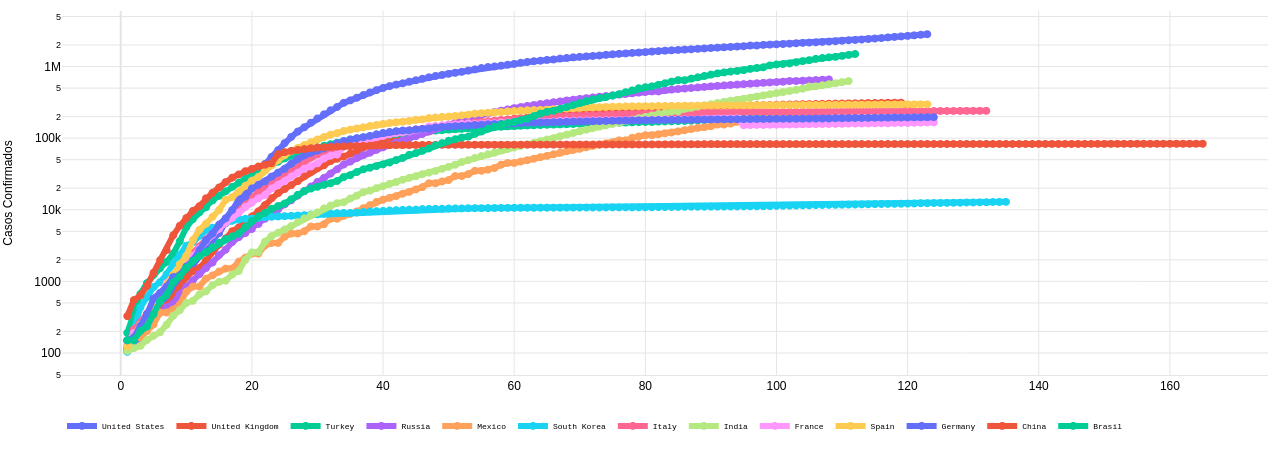

In [30]:
fig

## By Country

In [31]:
df = df_wordmeters.copy()

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['unique_country_daily']

codes = ['BR','IT','ES','US','CN','KR','DE','FR','UK','IN', 'TR','MX','RU']

# codes =['BR']
for countrycode in codes:
    mask = ((df['countrycode']==countrycode) & (df['confirmed']>0))
    fig = vis_graphs.unique_country(df[mask],themes)
#     plot(fig, filename=f"../images/singleCountry/{countrycode}.html", auto_open=False)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/singleCountry/{countrycode}_daily.html", auto_open=False)


themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['unique_country_cum']
# codes =['BR']
for countrycode in codes:
    mask = ((df['countrycode']==countrycode) & (df['confirmed']>0))
    fig = vis_graphs.unique_country(df[mask],themes)
#     plot(fig, filename=f"../images/singleCountry/{countrycode}.html", auto_open=False)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/singleCountry/{countrycode}_cum.html", auto_open=False)


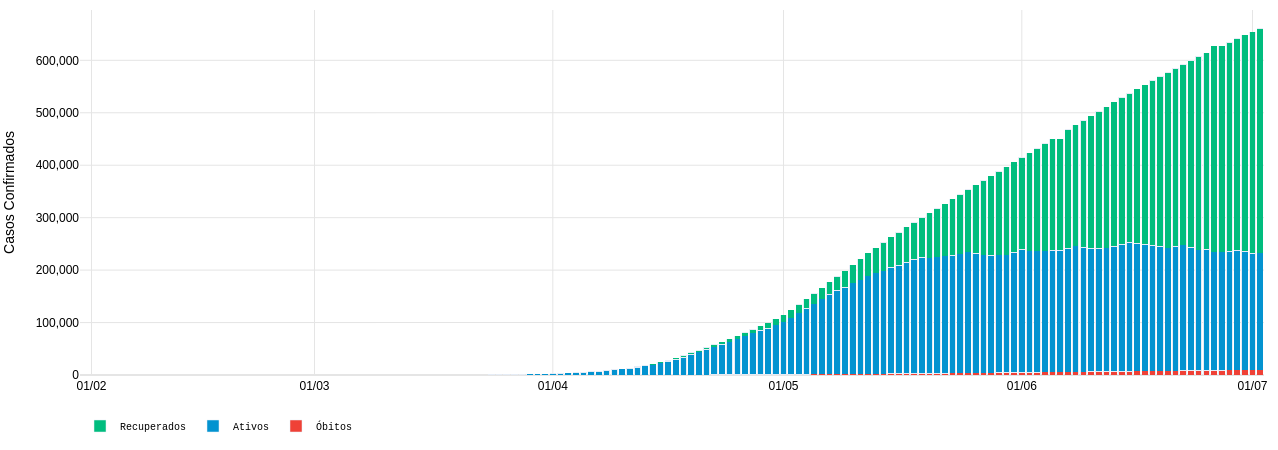

In [32]:
fig

## Estados

In [33]:
from scripts.io import read_sheets
from scripts import manipulation
config = yaml.load(open('../configs/config.yaml', 'r'), Loader=yaml.FullLoader)

io.update_ms_data()

df = pd.read_csv("../data/ministerio_da_saude/last_data_ms_covid19.csv")

df_states = manipulation.manipule_mytable(df,config['ms_table'])

print("States table, Done!")

downloaded
renamed
saved
States table, Done!


In [34]:
df_states.head()

,regiao,state,date,new_confirmed,confirmed,new_deaths,deaths,last_update,city
128,Brasil,BRASIL,2020-07-02,48105.0,1496858,1252.0,61884,2020-07-02 19:55,BRASIL
128,Brasil sem SP,BRASIL SEM SP,2020-07-02,35861.0,1194679,931.0,46533,2020-07-02 19:55,BRASIL SEM SP
2708,Sudeste,SP,2020-07-02,12244.0,302179,321.0,15351,2020-07-02 19:55,SP
2579,Sudeste,RJ,2020-07-02,1545.0,116823,134.0,10332,2020-07-02 19:55,RJ
1418,Nordeste,CE,2020-07-02,2507.0,115524,104.0,6284,2020-07-02 19:55,CE


## Multiple

In [35]:
from scripts import vis_graphs

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['brasil_vis_cumulative']

for var in themes['vars'].keys():
    for scale in themes['axis_legend']['scale'].keys():
        fig = vis_graphs.brasil_vis_cum(df_states, var,scale, themes)
        
        plot(fig, filename=f"../../sample_pages/pages/covid-19/images/brasil/cumulative/{var}_{scale}.html", auto_open=False)


## Diario

In [36]:
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['brasil_vis_daily']

codes = df_states['state'].unique()

for state in codes:
    mask = ((df_states['state']==state) & (df_states['confirmed']>0))
    fig = vis_graphs.unique_country(df_states[mask], themes)

    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/brasil/daily/{state}_daily.html", auto_open=False)
    
    
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['brasil_vis_cum']


for state in codes:
    mask = ((df_states['state']==state) & (df_states['confirmed']>0))
    fig = vis_graphs.unique_country(df_states[mask], themes)

    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/brasil/daily/{state}_cum.html", auto_open=False)

## Cidades

In [37]:
from scripts import io

!rm '../data/brIO/caso_full.csv'

!cd '../data/brIO/'
!wget 'https://data.brasil.io/dataset/covid19/caso_full.csv.gz' -P ../data/brIO/
!gunzip '../data/brIO/caso_full.csv.gz'


brio, brio_raw = io.load_brasilIO()

print("Br.IO table, Done!")

--2020-07-02 19:56:05--  https://data.brasil.io/dataset/covid19/caso_full.csv.gz
Resolving data.brasil.io (data.brasil.io)... 172.67.71.45, 104.26.9.175, 104.26.8.175, ...
Connecting to data.brasil.io (data.brasil.io)|172.67.71.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7646483 (7,3M) [application/gzip]
Saving to: ‘../data/brIO/caso_full.csv.gz’

caso_full.csv.gz    100%[===================>]   7,29M  5,09MB/s    in 1,4s    

2020-07-02 19:56:12 (5,09 MB/s) - ‘../data/brIO/caso_full.csv.gz’ saved [7646483/7646483]

Br.IO table, Done!


In [38]:
### Load Cities
cities = io.load_cities(brio_raw)

In [39]:
cities.tail()

,date,city,confirmed,new_confirmed,deaths,new_deaths
338,2020-06-24,São José dos Campos,2462.0,97.0,84.0,2.0
339,2020-06-25,São José dos Campos,2561.0,99.0,86.0,2.0
340,2020-06-26,São José dos Campos,2750.0,189.0,87.0,1.0
341,2020-06-27,São José dos Campos,2763.0,13.0,87.0,0.0
342,2020-06-28,São José dos Campos,2763.0,0.0,87.0,0.0


## Multiple Cities

In [40]:
from scripts import vis_graphs

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['cities']

for var in themes['vars'].keys():
    for scale in themes['axis_legend']['scale'].keys():
        fig = vis_graphs.brasil_vis_cum(cities, var,scale, themes)
        
        plot(fig, filename=f"../../sample_pages/pages/covid-19/images/vale/cumulative/{var}_{scale}.html", auto_open=False)


## Diario


In [41]:
import unidecode

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['cities_vis_daily']

codes = ['São Paulo', 'Taubaté', 'São José dos Campos']

for state in codes:
    mask = ((cities['city']==state) & (cities['confirmed']>0))
    fig = vis_graphs.unique_country(cities[mask], themes)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/vale/daily/{unidecode.unidecode(state.replace(' ','_').lower())}_daily.html", auto_open=False)

    
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['cities_vis_cum']
for state in codes:
    mask = ((cities['city']==state) & (cities['confirmed']>0))
    fig = vis_graphs.unique_country(cities[mask], themes)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/vale/daily/{unidecode.unidecode(state.replace(' ','_').lower())}_cum.html", auto_open=False)
    print(unidecode.unidecode(state.replace(' ','_').lower()))

sao_paulo
taubate
sao_jose_dos_campos


### Figures to UP

In [21]:
# from scripts import io

# f1_name = 'total_lin.html'
# f2_name = 'mortes_lin.html'
# f3_name = 'brasil_lin_total.html'
# f4_name = 'brasil_lin_mortes.html'
# # f5_name = "brasil_por_estado_confirmed.html"
# # f6_name = "brasil_por_estado_deaths.html"

# f1_path = f"../images/multipleCountry/{f1_name}"
# f2_path = f"../images/multipleCountry/{f2_name}"
# f3_path = f"../images/singleCountry/{f3_name}"
# f4_path = f"../images/singleCountry/{f4_name}"
# # f5_path = f"../images/brasil/{f5_name}"
# # f6_path = f"../images/brasil/{f6_name}"

# names_paths = {f1_name:f1_path,
#          f2_name:f2_path,
#          f3_name:f3_path,
#          f4_name:f4_path
#               }
# #          f5_name:f5_path,
# #          f6_name:f6_path}

# for name in names_paths.keys():
    
#     io.to_storage(bucket='sv-covid19',
#               bucket_folder='brasil',
#               file_name=name,
#               path_to_file=names_paths[name])